In [1]:
%load_ext autoreload
%autoreload 2

In [21]:
from tobii_pytracker.analyze.data_loader import DataLoader
from tobii_pytracker.configs.custom_config import CustomConfig

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from tobii_pytracker.analyze.models import (
    HeatmapAnalyzer,
    FocusMapAnalyzer,
    FixationAnalyzer,
    SaccadeAnalyzer,
    EntropyAnalyzer,
    ClusterAnalyzer,
    ConceptAnalyzer,
    ScanpathsAnalyzer,
    VoiceTranscription
)


config = CustomConfig('../configs/config.yaml')
loader = DataLoader(config, root='../')

2025-11-06 11:32:24,624 - tobii_pytracker.analyze.data_loader - INFO - Column 'gaze_count' already exists in 20251105_114523; skipping.
2025-11-06 11:32:24,630 - tobii_pytracker.analyze.data_loader - INFO - Column 'gaze_count' already exists in 20251105_114824; skipping.
2025-11-06 11:32:24,630 - tobii_pytracker.analyze.data_loader - INFO - Completed adding column 'gaze_count' to selected subjects.


Subjects: ['20251105_114523', '20251105_114824']
Using subject: 20251105_114523
Heatmap (per-slide) results:


,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,0,115.142857,-141.011905,84


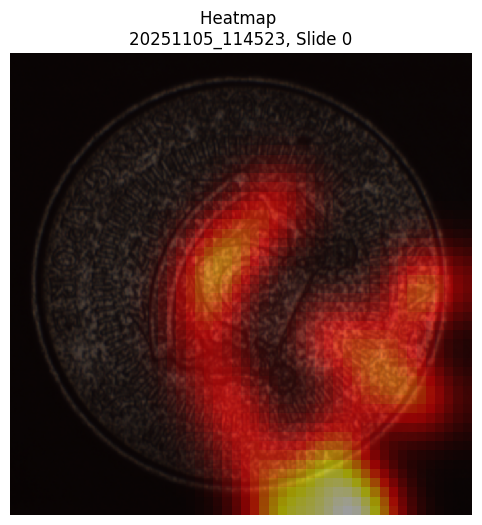

2025-11-06 11:32:24,892 - tobii_pytracker.analyze.data_loader - INFO - Column 'gaze_count' already exists in 20251105_114523; skipping.
2025-11-06 11:32:24,892 - tobii_pytracker.analyze.data_loader - INFO - Column 'gaze_count' already exists in 20251105_114824; skipping.
2025-11-06 11:32:24,892 - tobii_pytracker.analyze.data_loader - INFO - Completed adding column 'gaze_count' to selected subjects.


Heatmap (global, aggregated) results:


,input_data,avg_gaze_x,avg_gaze_y,gaze_count
0,datasets/pdt\Dirty\CAM2-20250304 181159912.bmp,115.142857,-141.011905,84
1,datasets/pdt\Discolored\CAM1-20250304 18125506...,159.611111,-156.666667,18


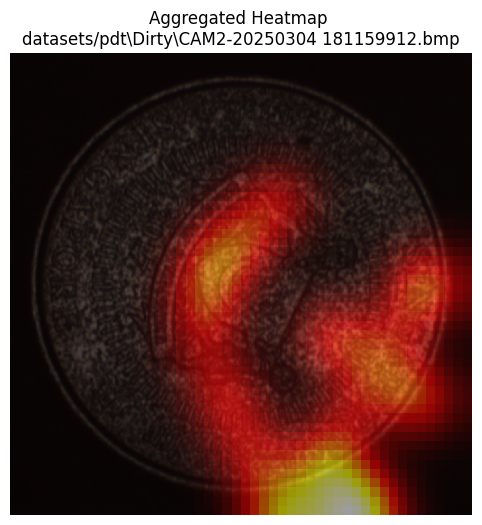

In [23]:
# %%
# Assume DataLoader instance already exists
print("Subjects:", loader.get_subjects())
set_name = loader.get_subjects()[0]  # pick first subject for demo
print(f"Using subject: {set_name}")

output_path = Path("analysis_outputs")
output_path.mkdir(exist_ok=True, parents=True)

# %% [markdown]
# ## 🔥 Heatmap Analyzer

# %%
# %%
heatmap_analyzer = HeatmapAnalyzer(data_loader=loader, output_folder=output_path)

# --- Per-slide analysis ---
heatmap_results = heatmap_analyzer.analyze(set_name=set_name, per="slide")
print("Heatmap (per-slide) results:")
display(heatmap_results.head())

# Visualize one slide overlayed over the screenshot
slide_index = int(heatmap_results["slide_index"].iloc[0])
heatmap_analyzer.plot_analysis(set_name=set_name, slide_index=slide_index, per="slide")

# # --- Global analysis across subjects ---
heatmap_global = heatmap_analyzer.analyze(set_name=set_name, per="global")
print("Heatmap (global, aggregated) results:")
display(heatmap_global.head())

# Visualize aggregated heatmap for one image (input_data)
input_data = heatmap_global["input_data"].iloc[0]
heatmap_analyzer.plot_analysis(set_name=set_name, input_data=input_data, per="global")